In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.io
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

data = scipy.io.loadmat('./data/MNIST.mat')

X = data['X']
print(X.shape)
I = data['I']
print(I.shape)

err_dict_2={}
err_dict_3={}
err_dict_k={}

(256, 1707)
(1, 1707)


[4]


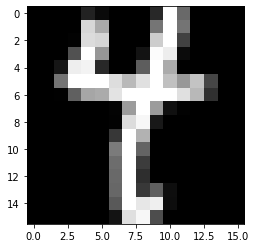

In [21]:
# Plot some example
i=16
test = X[:,i]
print(I[:,i])
test = np.reshape(test, (16,16))
plt.imshow(test, cmap='gray')

In [22]:
# Extract digit-wise train matrices
_, index_1 = np.where(I==3)

X_1 = X[:, index_1]

# Compute the SVD decomposition of X_1 and X_2
U, _, _ = np.linalg.svd(X_1, full_matrices=False)

In [23]:
U.shape

(256, 131)

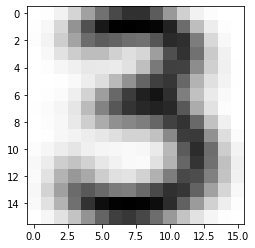

In [81]:
i=0
test = U[:,i]
test = np.reshape(test, (16,16))
plt.imshow(test, cmap='gray')

## 2-digits example

In [82]:
def classify_2(d1, d2, y_test, classes):
    y_test = y_test[0]
    y_pred = np.array([classes[0] if d1[i] < d2[i] else classes[1] for i in range(len(d1))])
    mse = np.mean(y_pred != y_test)*100
    nmse = np.sum(y_pred != y_test)

    cm = confusion_matrix(y_test, y_pred)

    df_cm = pd.DataFrame(cm, index = classes,
                  columns = classes)
    plt.figure(figsize = (5,5))
    sn.heatmap(df_cm, annot=True)

    return mse, nmse
        

def SVD_classification_2(X_train, y_train, X_test, y_test, classes):

    # Extract digit-wise train matrices
    _, index_1 = np.where(y_train==classes[0])
    _, index_2 = np.where(y_train==classes[1])

    X_1 = X_train[:, index_1]
    X_2 = X_train[:, index_2]

    # Compute the SVD decomposition of X_1 and X_2
    U_1, _, _ = np.linalg.svd(X_1, full_matrices=False)
    U_2, _, _ = np.linalg.svd(X_2, full_matrices=False)

    # print(U_1.shape)

    # Compute the projections of y into the two spaces
    y_1 = U_1 @ (U_1.T @ X_test)
    y_2 = U_2 @ (U_2.T @ X_test)

    d1 = np.linalg.norm(y_1-X_test, axis=0)
    d2 = np.linalg.norm(y_2-X_test, axis=0)

    mse, nmse = classify_2(d1, d2, y_test, classes)

    print(f'Misclassification error for digits {classes[0]} and {classes[1]}:')
    print(f'{mse:.2f}%')
    print(f'Number of misclassified digits:')
    print(nmse)
    
    return mse

def run_experiment_2(X, I, digits, err):

    digits.sort()

    # Split train and test set 
    X_train, X_test, I_train, I_test = train_test_split(X.T, I.T, test_size=.2, random_state=42)
    X_train, X_test, I_train, I_test = X_train.T, X_test.T, I_train.T, I_test.T

    # Extract the subdataset of X that contains desidered digits
    _, indexes = np.where((I_train==digits[0]) | (I_train==digits[1]))

    I_train = I_train[:, indexes]
    X_train = X_train[:, indexes]

    _, indexes = np.where((I_test==digits[0]) | (I_test==digits[1]))

    I_test = I_test[:, indexes]
    X_test = X_test[:, indexes]

    # Bulk classification
    mse = SVD_classification_2(X_train, I_train, X_test, I_test, digits)

    err[f'{digits[0]}_{digits[1]}'] = round(mse,2)

    return
    


Misclassification error for digits 3 and 5:
13.33%
Number of misclassified digits:
4


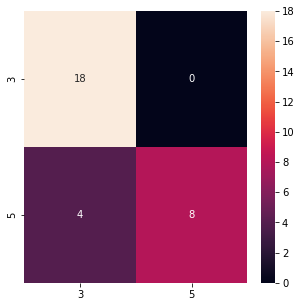

In [83]:
run_experiment_2(X, I, [3,5], err_dict_2)

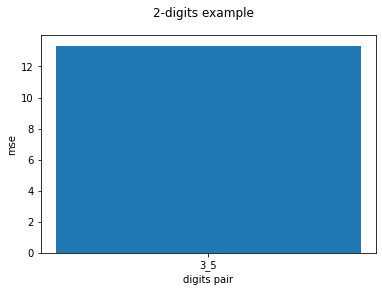

In [84]:
# Plot error
fig = plt.figure()
plt.bar(range(len(err_dict_2)), list(err_dict_2.values()), align='center')
plt.xticks(range(len(err_dict_2)), list(err_dict_2.keys()))
plt.xlabel('digits pair')
plt.ylabel('mse')
fig.suptitle('2-digits example')
plt.show()

## 3-digits example

In [85]:
def classify_3(d1, d2, d3, y_test, classes):
    y_test = y_test[0]
    y_pred = [classes[np.argmin([d1[i], d2[i], d3[i]])] for i in range(len(d1))]
    mse = np.mean(y_pred != y_test)*100
    nmse = np.sum(y_pred != y_test)

    cm = confusion_matrix(y_test, y_pred)
    
    df_cm = pd.DataFrame(cm, index = classes,
                  columns = classes)
    plt.figure(figsize = (5,5))
    sn.heatmap(df_cm, annot=True)

    return mse, nmse
        

def SVD_classification_3(X_train, y_train, X_test, y_test, classes):

    # Extract digit-wise train matrices
    _, index_1 = np.where(y_train==classes[0])
    _, index_2 = np.where(y_train==classes[1])
    _, index_3 = np.where(y_train==classes[2])

    X_1 = X_train[:, index_1]
    X_2 = X_train[:, index_2]
    X_3 = X_train[:, index_3]

    # Compute the SVD decomposition
    U_1, _, _ = np.linalg.svd(X_1, full_matrices=False)
    U_2, _, _ = np.linalg.svd(X_2, full_matrices=False)
    U_3, _, _ = np.linalg.svd(X_3, full_matrices=False)

    # Compute the projections of y
    y_1 = U_1 @ (U_1.T @ X_test)
    y_2 = U_2 @ (U_2.T @ X_test)
    y_3 = U_3 @ (U_3.T @ X_test)

    d1 = np.linalg.norm(y_1-X_test, axis=0)
    d2 = np.linalg.norm(y_2-X_test, axis=0)
    d3 = np.linalg.norm(y_3-X_test, axis=0)

    mse, nmse = classify_3(d1, d2, d3, y_test, classes)

    print(f'Misclassification error for digits {classes[0]}, {classes[1]} and {classes[2]}:')
    print(f'{mse:.2f}%')
    print(f'Number of misclassified digits:')
    print(nmse)
    
    return mse

def run_experiment_3(X, I, digits, err):
    
    digits.sort()
    
    # Split train and test set 
    X_train, X_test, I_train, I_test = train_test_split(X.T, I.T, test_size=.2, random_state=42)
    X_train, X_test, I_train, I_test = X_train.T, X_test.T, I_train.T, I_test.T

    # Extract the subdataset of X that contains desidered digits
    _, indexes = np.where((I_train==digits[0]) | (I_train==digits[1]) | (I_train==digits[2]))

    I_train = I_train[:, indexes]
    X_train = X_train[:, indexes]

    _, indexes = np.where((I_test==digits[0]) | (I_test==digits[1]) | (I_test==digits[2]))

    I_test = I_test[:, indexes]
    X_test = X_test[:, indexes]
    
    # Bulk classification
    mse = SVD_classification_3(X_train, I_train, X_test, I_test, digits)

    err[f'{digits[0]}_{digits[1]}_{digits[2]}'] = round(mse,2)

    return
    


Misclassification error for digits 1, 4 and 7:
12.90%
Number of misclassified digits:
16


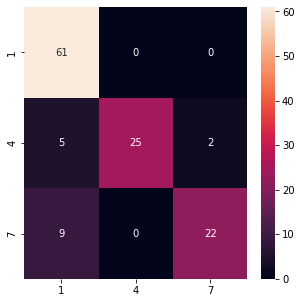

In [86]:
run_experiment_3(X, I, [1,4,7], err_dict_3)

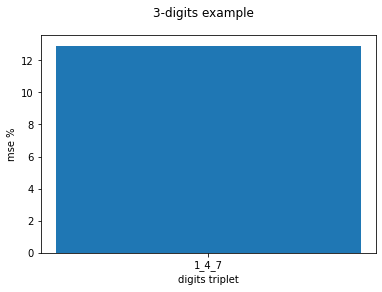

In [87]:
# Plot error
fig = plt.figure()
plt.bar(range(len(err_dict_3)), list(err_dict_3.values()), align='center')
plt.xticks(range(len(err_dict_3)), list(err_dict_3.keys()))
plt.xlabel('digits triplet')
plt.ylabel('mse %')
fig.suptitle('3-digits example')
plt.show()

Misclassification error for digits [1, 2, 3, 4, 5, 6, 7, 8, 9]:
23.64%
Number of misclassified digits:
65


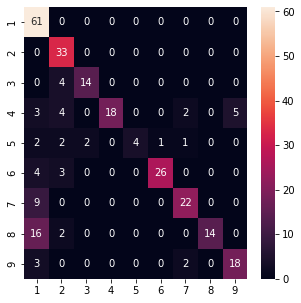

In [90]:
def classify_k(d, y_test, classes):
    y_test = y_test[0]
    d = np.transpose(d, (1,0))
    
    y_pred = np.array([classes[i] for i in np.argmin(d, axis=1)])
    
    mse = np.mean(y_pred != y_test)*100
    nmse = np.sum(y_pred != y_test)

    cm = confusion_matrix(y_test, y_pred)
    
    df_cm = pd.DataFrame(cm, index = classes,
                  columns = classes)
    plt.figure(figsize = (5,5))
    sn.heatmap(df_cm, annot=True)

    return mse, nmse
        

def SVD_classification_k(X_train, y_train, X_test, y_test, classes):
    d = np.zeros((len(classes), X_test.shape[1]))

    for i in range(len(classes)):

        # Extract digit-wise train matrices
        _, index = np.where(y_train==classes[i])

        X = X_train[:, index]

        # Compute the SVD decomposition
        U, _, _ = np.linalg.svd(X, full_matrices=False)

        # Compute the projections of y
        y = U @ (U.T @ X_test)
        d[i] = np.linalg.norm(y-X_test, axis=0)

    mse, nmse = classify_k(d, y_test, classes)

    print(f'Misclassification error for digits {classes}:')
    print(f'{mse:.2f}%')
    print(f'Number of misclassified digits:')
    print(nmse)
    
    return mse

def run_experiment_k(X, I, digits, err):
    
    digits.sort()
    
    # Split train and test set 
    X_train, X_test, I_train, I_test = train_test_split(X.T, I.T, test_size=.2, random_state=42)
    X_train, X_test, I_train, I_test = X_train.T, X_test.T, I_train.T, I_test.T

    # Extract the subdataset of X that contains desidered digits
    [indexes] = np.isin(I_train,digits)

    I_train = I_train[:, indexes]
    X_train = X_train[:, indexes]

    [indexes] = np.isin(I_test,digits)

    I_test = I_test[:, indexes]
    X_test = X_test[:, indexes]
    
    # Bulk classification
    mse = SVD_classification_k(X_train, I_train, X_test, I_test, digits)

    err[f'{digits}'] = round(mse,2)

    return
  
run_experiment_k(X, I, [1,2,3,4,5,6,7,8,9], err_dict_k)


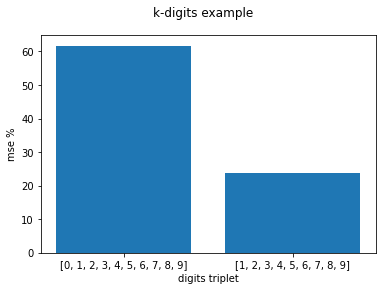

In [115]:
# Plot error
fig = plt.figure()
plt.bar(range(len(err_dict_k)), list(err_dict_k.values()), align='center')
plt.xticks(range(len(err_dict_k)), list(err_dict_k.keys()))
plt.xlabel('digits triplet')
plt.ylabel('mse %')
fig.suptitle('k-digits example')
plt.show()